In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Train_SU63ISt.csv")

In [3]:
df.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [4]:
df = pd.read_csv('Train_SU63ISt.csv', nrows = 11856)

In [5]:
train=df[0:10392]
test=df[10392:]

In [8]:
df.Timestamp=pd.to_datetime(df.Datetime,format='%d-%m-%Y %H:%M')
df.index=df.Timestamp
df = df.resample('D').mean()
train.Timestamp=pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
train.index=train.Timestamp
train = train.resample('D').mean()
test.Timestamp=pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M')
test.index=test.Timestamp
test=test.resample('D').mean()

<ipython-input-8-f6d770c26964>:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp=pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
<ipython-input-8-f6d770c26964>:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp=pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M')


In [9]:
df.head()

,ID,Count
Datetime,,
2012-08-25,11.5,3.166667
2012-08-26,35.5,3.666667
2012-08-27,59.5,2.583333
2012-08-28,83.5,2.416667
2012-08-29,107.5,2.500000


<AxesSubplot:title={'center':'Daily Ridership'}, xlabel='Datetime'>

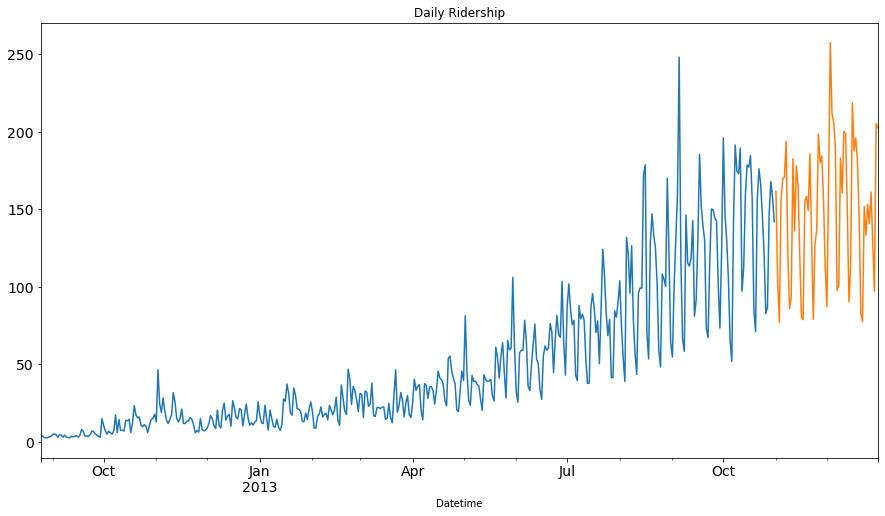

In [12]:
train.Count.plot(figsize=(15,8),title= 'Daily Ridership', fontsize=14)
test.Count.plot(figsize=(15,8),title='Daily Ridership',fontsize=14)

##Naive Approach


In [13]:
dd=np.asarray(train.Count)

In [14]:
y_hat=test.copy()

In [15]:
y_hat["naive"]=dd[len(dd)-1]

Text(0.5, 1.0, 'Naive Forecast')

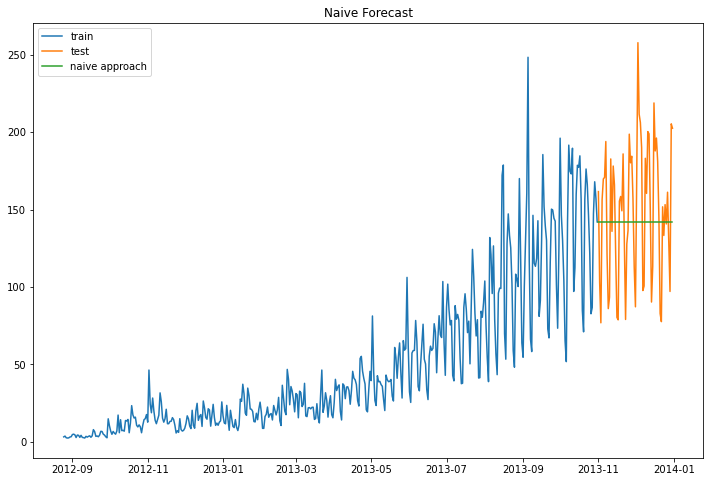

In [16]:
plt.figure(figsize=(12,8))

plt.plot(train.index,train["Count"],label="train")
plt.plot(test.index,test["Count"],label="test")
plt.plot(y_hat.index,y_hat["naive"],label="naive approach")

plt.legend(loc='best')
plt.title("Naive Forecast")


In [17]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.Count, y_hat.naive))
print(rms)

43.91640614391676


## Simple average

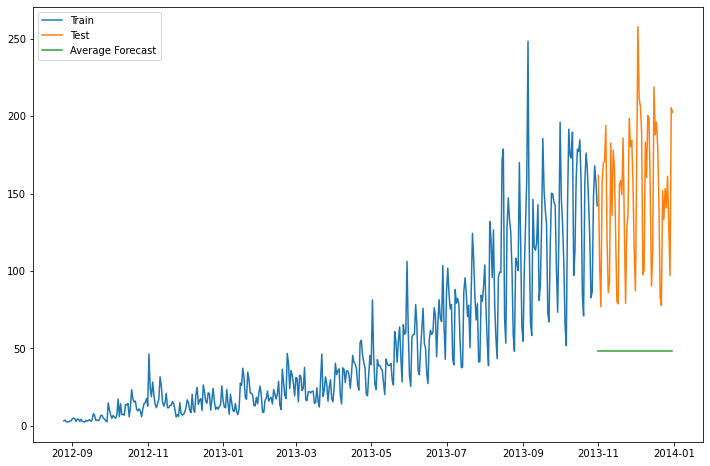

In [18]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Count'].mean()
plt.figure(figsize=(12,8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')

plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [19]:
rms = sqrt(mean_squared_error(test.Count, y_hat_avg.avg_forecast))
print(rms)

109.88526527082863


## Moving Average


In [20]:
y_hat_avg = test.copy()

In [21]:
train['Count'].rolling(60).mean().iloc[-1]

131.76111111111112

In [22]:
train.iloc[373:,1].mean()

131.76111111111112

In [23]:
train.iloc[373:,1].mean()

131.76111111111112

In [24]:
y_hat_avg['moving_avg_forecast'] = train['Count'].rolling(60).mean().iloc[-1]

In [25]:
y_hat_avg.head(2)

,ID,Count,moving_avg_forecast
Datetime,,,
2013-11-01,10403.5,161.583333,131.761111
2013-11-02,10427.5,103.083333,131.761111


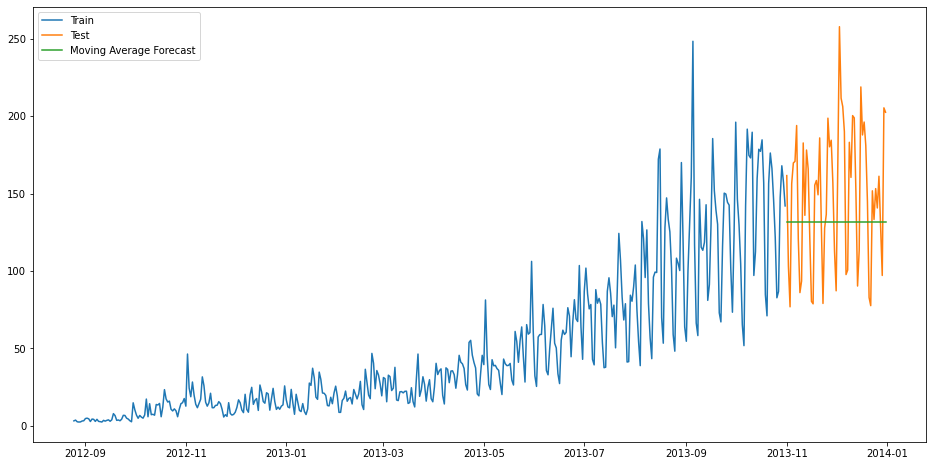

In [26]:
plt.figure(figsize=(16,8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [27]:
rms = sqrt(mean_squared_error(test.Count, y_hat_avg.moving_avg_forecast))
print(rms)

46.72840725106963


##Simple Exponential Smoothing


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


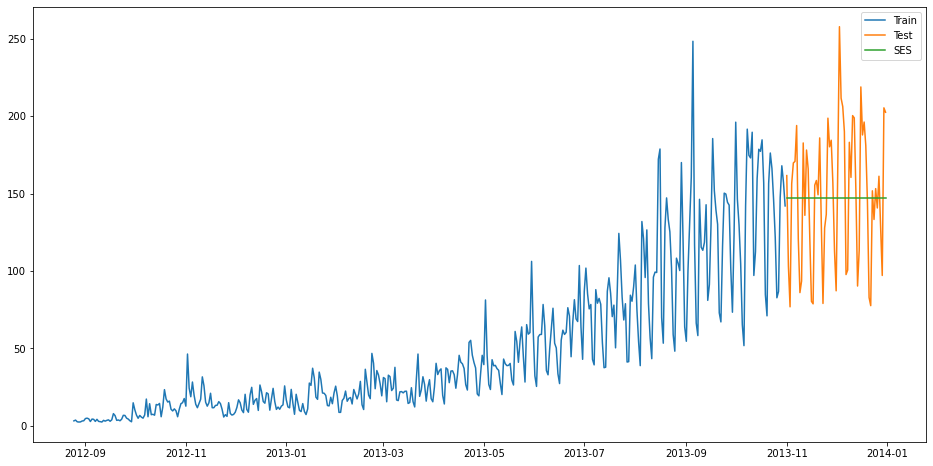

In [28]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Count'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()


In [29]:
rms = sqrt(mean_squared_error(test.Count, y_hat_avg.SES))
print(rms)

43.357625225228155


##Holt’s Linear Trend method


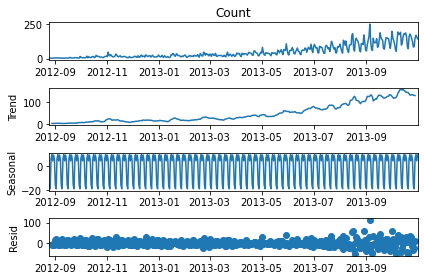

In [30]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train.Count).plot()
result = sm.tsa.stattools.adfuller(train.Count)
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-31-c649925420d7>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['Count'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)


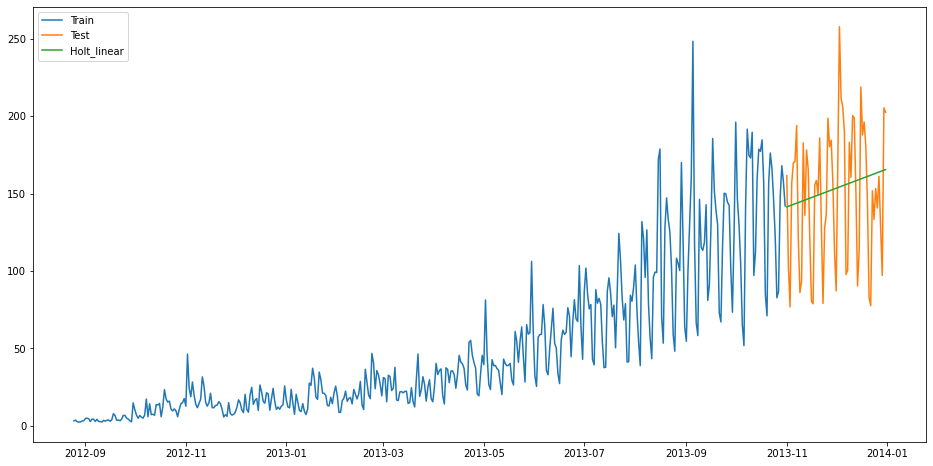

In [31]:
y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['Count'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [32]:
rms = sqrt(mean_squared_error(test.Count, y_hat_avg.Holt_linear))
print(rms)

43.056259611507286


##AutoRegressive Integrated Moving Average(ARIMA)

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


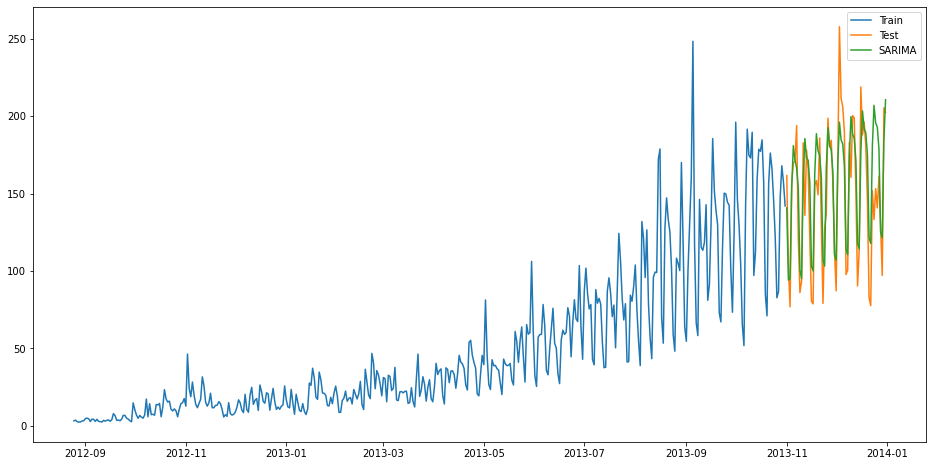

In [33]:
y_hat_avg = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train.Count, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2013-11-1", end="2013-12-31", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [34]:
rms = sqrt(mean_squared_error(test.Count, y_hat_avg.SARIMA))
print(rms)

26.053692092579592


##Holt-Winters Method¶

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


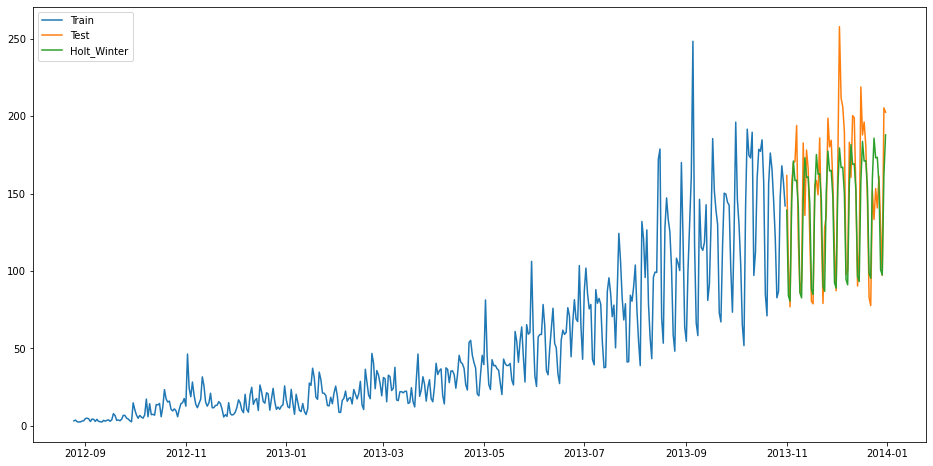

In [35]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Count']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()


In [36]:
rms = sqrt(mean_squared_error(test.Count, y_hat_avg.Holt_Winter))
print(rms)


25.264496449543422
